## Regional NSW Restaurant Study

## Part I - Sydney Venues

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize

### Location of Sydney's Dining Districts

In [2]:
# create a dataframe with lat & long of Sydney's trendiest dining districts

d = {'Suburb': ['Surry Hills','Newtown','Parramatta','Balmain','Cronulla'], 'Latitude': [-33.886111, -33.897800, -33.813600, -33.858900, -34.057400], 'Longitude': [151.213500, 151.178500, 151.003400, 151.179100, 151.152200]}
dfSuburbs = pd.DataFrame(data=d)
dfSuburbs

,Suburb,Latitude,Longitude
0,Surry Hills,-33.886111,151.2135
1,Newtown,-33.897800,151.1785
2,Parramatta,-33.813600,151.0034
3,Balmain,-33.858900,151.1791
4,Cronulla,-34.057400,151.1522


### Foursquare API

In [3]:
CLIENT_ID = 'RTOQNYMPW5JQSAN2LX0NSRUIS3WQALRBOU31IP1BNOQNZ1W4' 
CLIENT_SECRET = 'B0PJBRX0IDG42NZFPWA1VPYVU1UVNAUCR2S05X33B2SW4KLT' 
VERSION = '20180605' 

### Finding Sydney's Top Restaurants

In [4]:
LIMIT = 100
radius = 1000 # set radius to 1km
syd_venues=[]


#--------------------------------------------------------------------

# Find venues for Surry Hills

lat= dfSuburbs.iloc[0][1]
lng= dfSuburbs.iloc[0][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])



#-------------------------------------------------------------------

# Find Venues for Newtown

lat= dfSuburbs.iloc[1][1]
lng= dfSuburbs.iloc[1][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

#-------------------------------------------------------------------

# Find Venues for Parramatta

lat= dfSuburbs.iloc[2][1]
lng= dfSuburbs.iloc[2][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

#-------------------------------------------------------------------

# Find Venues for Balmain

lat= dfSuburbs.iloc[3][1]
lng= dfSuburbs.iloc[3][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

#-------------------------------------------------------------------

# Find Venues for Cronulla

lat= dfSuburbs.iloc[4][1]
lng= dfSuburbs.iloc[4][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])


In [5]:
syd_complete = pd.DataFrame([item for syd_venues in syd_venues for item in syd_venues])

syd_complete.columns = [
                  'Venue', 
                  'Venue Category']

syd_complete.head()

,Venue,Venue Category
0,Cuckoo Callay,Café
1,Bourke Street Bakery,Bakery
2,The Dolphin Hotel,Pub
3,MV Bistro & Wine Bar,Wine Bar
4,Gelato Messina,Ice Cream Shop


In [6]:
count = syd_complete.groupby(['Venue Category']).agg(['nunique'])
count.shape
count.head()

,Venue
,nunique
Venue Category,
Argentinian Restaurant,1
Asian Restaurant,1
Australian Restaurant,7
Bakery,8
Bar,4


### DATA REVIEW

A good start of data collection, with a good cross section, but in order to generate useful insights more data points will be needed.  
Next step will be adding more dining precincts to suburbs dataframe...

In [7]:
df2 = pd.DataFrame([['Manly', -33.7932, 151.2876], ['Bondi', -33.8915, 151.2767], ['Glebe', -33.879800, 151.187000], ['Crows Nest', -33.8240, 151.2010], ['Randwick', -33.9211, 151.2381], ['Penrith', -33.753259, 150.696144]], columns = ['Suburbs', 'Latitude', 'Longitude'])
df2                   

,Suburbs,Latitude,Longitude
0,Manly,-33.793200,151.287600
1,Bondi,-33.891500,151.276700
2,Glebe,-33.879800,151.187000
3,Crows Nest,-33.824000,151.201000
4,Randwick,-33.921100,151.238100
5,Penrith,-33.753259,150.696144


In [8]:
LIMIT = 100
radius = 1000 # set radius to 1km



#--------------------------------------------------------------------

# Find venues for Manly

lat= df2.iloc[0][1]
lng= df2.iloc[0][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])



#-------------------------------------------------------------------

# Find Venues for Bondi

lat= df2.iloc[1][1]
lng= df2.iloc[1][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

#-------------------------------------------------------------------

# Find Venues for Glebe

lat= df2.iloc[2][1]
lng= df2.iloc[2][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

#-------------------------------------------------------------------

# Find Venues for Crows Nest

lat= df2.iloc[3][1]
lng= df2.iloc[3][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

#-------------------------------------------------------------------

# Find Venues for Randwick

lat= df2.iloc[4][1]
lng= df2.iloc[4][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])


#-------------------------------------------------------------------

# Find Venues for Penrith

lat= df2.iloc[5][1]
lng= df2.iloc[5][2]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to syd_venues
syd_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

In [9]:
syd_complete = pd.DataFrame([item for syd_venues in syd_venues for item in syd_venues])

syd_complete.columns = [
                  'Venue', 
                  'Venue Category']

# check to see new venues have been added
syd_complete.tail()

,Venue,Venue Category
543,Kingston & Co,Café
544,Mad Mex,Mexican Restaurant
545,Cafe Gourmet,Café
546,RJ Kababs,Diner
547,Viva Fresh,Sandwich Place


### Sort and Clean new Data

In [10]:
count = syd_complete.groupby(['Venue Category']).agg(['nunique'])
count.reset_index(inplace=True) 
count.columns = ['Category','Count']
count.sort_values(by=['Count'], inplace = True, ascending = False)
count.reset_index(drop=True, inplace = True)
toptrend = count[0:25]
toptrend

,Category,Count
0,Café,127
1,Coffee Shop,28
2,Thai Restaurant,20
3,Japanese Restaurant,19
4,Bakery,18
5,Italian Restaurant,18
6,Pizza Place,17
7,Australian Restaurant,15
8,Burger Joint,14
9,Ice Cream Shop,12


In [34]:
# create new dataframes with 'bar' focused offerings...
bartrend = toptrend.loc[ [0,1,17,13] , : ]
bartrend.reset_index(drop=True, inplace=True)
bartrend


,Category,Count
0,Café,127
1,Coffee Shop,28
2,Bar,8
3,Pub,9


In [35]:
# create new dataframes with 'food' focused offerings...

foodtrend = toptrend
foodtrend = foodtrend.drop([0,1,13,17], axis=0)
foodtrend.reset_index(drop=True, inplace=True)

foodtrend

,Category,Count
0,Thai Restaurant,20
1,Japanese Restaurant,19
2,Bakery,18
3,Italian Restaurant,18
4,Pizza Place,17
5,Australian Restaurant,15
6,Burger Joint,14
7,Ice Cream Shop,12
8,Restaurant,11
9,Chinese Restaurant,9


In [36]:
# drop row with food catagory 'restaurant'

foodtrend = foodtrend.drop([8], axis=0)
foodtrend.reset_index(drop=True, inplace=True)

foodtrend

,Category,Count
0,Thai Restaurant,20
1,Japanese Restaurant,19
2,Bakery,18
3,Italian Restaurant,18
4,Pizza Place,17
5,Australian Restaurant,15
6,Burger Joint,14
7,Ice Cream Shop,12
8,Chinese Restaurant,9
9,Vietnamese Restaurant,9


In [37]:
# add total and percentage to dataframe

foodtrend = foodtrend.append(foodtrend.sum(numeric_only=True).rename('Total'))
x = foodtrend.loc[:,'Count']/210*100
SYDfoodtrend = pd.concat([foodtrend, x.rename('%')], axis=1)
SYDfoodtrend = SYDfoodtrend.round(decimals=1)
SYDfoodtrend

,Category,Count,%
0,Thai Restaurant,20.0,9.5
1,Japanese Restaurant,19.0,9.0
2,Bakery,18.0,8.6
3,Italian Restaurant,18.0,8.6
4,Pizza Place,17.0,8.1
5,Australian Restaurant,15.0,7.1
6,Burger Joint,14.0,6.7
7,Ice Cream Shop,12.0,5.7
8,Chinese Restaurant,9.0,4.3
9,Vietnamese Restaurant,9.0,4.3


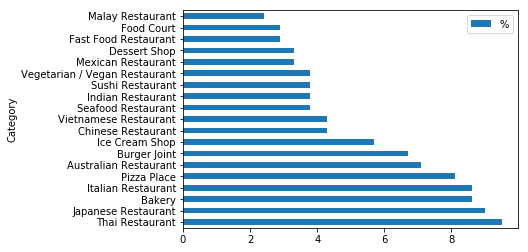

In [38]:
import matplotlib.pyplot as plt
SYDdf = SYDfoodtrend[0:19]
SYDdf.plot.barh(x='Category', y='%')

Now that there is a good understanding of the most popular offerings across Sydney, the next step will be to compare with Regional NSWs fasting growing areas.

## Part II - Regional Venues

### NSW Fastest Growing Areas

In [27]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Area,Population,5y Increase,Lat,Lng
0,0,Bowral – Mittagong,"40,411",0.081,-34.4792,150.4181
1,1,Port Macquarie,"48,723",0.077,-31.4333,152.9000
2,2,Nowra – Bomaderry,"37,838",0.061,-34.8833,150.6000
3,3,Wollongong,"306,034",0.059,-34.4278,150.8931
4,4,Coffs Harbour,"72,541",0.058,-30.2986,153.1094
5,5,Nelson Bay,"28,276",0.052,-32.7150,152.1511


In [28]:
# Clean the dataframe

dfNSW.drop(columns='Unnamed: 0', inplace=True)


dfNSW

,Area,Population,5y Increase,Lat,Lng
0,Bowral – Mittagong,"40,411",0.081,-34.4792,150.4181
1,Port Macquarie,"48,723",0.077,-31.4333,152.9000
2,Nowra – Bomaderry,"37,838",0.061,-34.8833,150.6000
3,Wollongong,"306,034",0.059,-34.4278,150.8931
4,Coffs Harbour,"72,541",0.058,-30.2986,153.1094
5,Nelson Bay,"28,276",0.052,-32.7150,152.1511


### Find Existing Restaurant Offerings in selected areas

In [29]:
nsw_venues=[]

# Find venues for Bowral

lat= dfNSW.iloc[0][3]
lng= dfNSW.iloc[0][4]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to nsw_venues
nsw_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

dfBow = pd.DataFrame([item for nsw_venues in nsw_venues for item in nsw_venues])

dfBow.columns = [
                  'Venue', 
                  'Venue Category']


# ---------------------------------------------------------------------------

nsw_venues=[]

# Find venues for Port Macquarie

lat= dfNSW.iloc[1][3]
lng= dfNSW.iloc[1][4]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to nsw_venues
nsw_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

dfPMQ = pd.DataFrame([item for nsw_venues in nsw_venues for item in nsw_venues])

dfPMQ.columns = [
                  'Venue', 
                  'Venue Category']


# ---------------------------------------------------------------------------

nsw_venues=[]

# Find venues for Nowra

lat= dfNSW.iloc[2][3]
lng= dfNSW.iloc[2][4]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to nsw_venues
nsw_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

dfNow = pd.DataFrame([item for nsw_venues in nsw_venues for item in nsw_venues])

dfNow.columns = [
                  'Venue', 
                  'Venue Category']


# ---------------------------------------------------------------------------

nsw_venues=[]

# Find venues for Wooloogong

lat= dfNSW.iloc[3][3]
lng= dfNSW.iloc[3][4]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to nsw_venues
nsw_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

dfWoo = pd.DataFrame([item for nsw_venues in nsw_venues for item in nsw_venues])

dfWoo.columns = [
                  'Venue', 
                  'Venue Category']


# ---------------------------------------------------------------------------

nsw_venues=[]

# Find venues for Coffs Harbour

lat= dfNSW.iloc[4][3]
lng= dfNSW.iloc[4][4]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to nsw_venues
nsw_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

dfCof = pd.DataFrame([item for nsw_venues in nsw_venues for item in nsw_venues])

dfCof.columns = [
                  'Venue', 
                  'Venue Category']


# ---------------------------------------------------------------------------

nsw_venues=[]

# Find venues for Nelson Bay

lat= dfNSW.iloc[5][3]
lng= dfNSW.iloc[5][4]

url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']

# add venue names and categories to nsw_venues
nsw_venues.append([(
            v['name'],   
            v['categories'][0]['name']) for v in results])

dfBay = pd.DataFrame([item for nsw_venues in nsw_venues for item in nsw_venues])

dfBay.columns = [
                  'Venue', 
                  'Venue Category']


# ---------------------------------------------------------------------------



In [39]:
Bow_count = dfBow.groupby(['Venue Category']).agg(['nunique'])
PMQ_count = dfPMQ.groupby(['Venue Category']).agg(['nunique'])
Now_count = dfNow.groupby(['Venue Category']).agg(['nunique'])
Woo_count = dfWoo.groupby(['Venue Category']).agg(['nunique'])
Cof_count = dfCof.groupby(['Venue Category']).agg(['nunique'])
Bay_count = dfBay.groupby(['Venue Category']).agg(['nunique'])


Bow_count.reset_index(inplace=True) 
PMQ_count.reset_index(inplace=True) 
Now_count.reset_index(inplace=True) 
Woo_count.reset_index(inplace=True) 
Cof_count.reset_index(inplace=True) 
Bay_count.reset_index(inplace=True) 



Bow_count.columns = ['Category','Count']
PMQ_count.columns = ['Category','Count']
Now_count.columns = ['Category','Count']
Woo_count.columns = ['Category','Count']
Cof_count.columns = ['Category','Count']
Bay_count.columns = ['Category','Count']


Bow_count.sort_values(by=['Count'], inplace = True, ascending = False)
PMQ_count.sort_values(by=['Count'], inplace = True, ascending = False)
Now_count.sort_values(by=['Count'], inplace = True, ascending = False)
Woo_count.sort_values(by=['Count'], inplace = True, ascending = False)
Cof_count.sort_values(by=['Count'], inplace = True, ascending = False)
Bay_count.sort_values(by=['Count'], inplace = True, ascending = False)


Bow_count.reset_index(drop=True, inplace = True)
PMQ_count.reset_index(drop=True, inplace = True)
Now_count.reset_index(drop=True, inplace = True)
Woo_count.reset_index(drop=True, inplace = True)
Cof_count.reset_index(drop=True, inplace = True)
Bay_count.reset_index(drop=True, inplace = True)




In [40]:
# Drop Cafe row for each dataframe

Bow_count = Bow_count.drop([0], axis=0)
Bow_count.reset_index(drop=True, inplace=True)

PMQ_count = PMQ_count.drop([0], axis=0)
PMQ_count.reset_index(drop=True, inplace=True)

Now_count = Now_count.drop([0], axis=0)
Now_count.reset_index(drop=True, inplace=True)

Woo_count = Bow_count.drop([0], axis=0)
Woo_count.reset_index(drop=True, inplace=True)

Cof_count = Cof_count.drop([0], axis=0)
Cof_count.reset_index(drop=True, inplace=True)

Bay_count = Bow_count.drop([0], axis=0)
Bay_count.reset_index(drop=True, inplace=True)

In [41]:
# Create a dataframe that collects all the data across that research areas.

dfALL = SYDdf
dfALL = dfALL.join(Bow_count, rsuffix='_BOW')
dfALL = dfALL.join(PMQ_count, rsuffix='_PMQ')
dfALL = dfALL.join(Now_count, rsuffix='_NOW')
dfALL = dfALL.join(Woo_count, rsuffix='_WOO')
dfALL = dfALL.join(Cof_count, rsuffix='_COF')
dfALL = dfALL.join(Bay_count, rsuffix='_BAY')
dfALL

,Category,Count,%,Category_BOW,Count_BOW,Category_PMQ,Count_PMQ,Category_NOW,Count_NOW,Category_WOO,Count_WOO,Category_COF,Count_COF,Category_BAY,Count_BAY
0,Thai Restaurant,20.0,9.5,Coffee Shop,4,Bakery,6,Fast Food Restaurant,5,Bakery,3,Coffee Shop,5,Bakery,3
1,Japanese Restaurant,19.0,9.0,Bakery,3,Restaurant,3,Bakery,3,Pizza Place,3,Thai Restaurant,3,Pizza Place,3
2,Bakery,18.0,8.6,Pizza Place,3,Coffee Shop,3,Sushi Restaurant,2,Australian Restaurant,2,Australian Restaurant,3,Australian Restaurant,2
3,Italian Restaurant,18.0,8.6,Australian Restaurant,2,Seafood Restaurant,3,Restaurant,2,Chinese Restaurant,2,Juice Bar,2,Chinese Restaurant,2
4,Pizza Place,17.0,8.1,Chinese Restaurant,2,Thai Restaurant,2,Pizza Place,2,Thai Restaurant,2,Japanese Restaurant,2,Thai Restaurant,2
5,Australian Restaurant,15.0,7.1,Thai Restaurant,2,Fast Food Restaurant,2,Noodle House,2,French Restaurant,2,Fast Food Restaurant,2,French Restaurant,2
6,Burger Joint,14.0,6.7,French Restaurant,2,Tea Room,1,Thai Restaurant,2,Italian Restaurant,2,African Restaurant,2,Italian Restaurant,2
7,Ice Cream Shop,12.0,5.7,Italian Restaurant,2,Sushi Restaurant,1,Coffee Shop,2,Japanese Restaurant,1,Chinese Restaurant,2,Japanese Restaurant,1
8,Chinese Restaurant,9.0,4.3,Japanese Restaurant,1,Steakhouse,1,Chinese Restaurant,2,Vegetarian / Vegan Restaurant,1,Cocktail Bar,1,Vegetarian / Vegan Restaurant,1
9,Vietnamese Restaurant,9.0,4.3,Vegetarian / Vegan Restaurant,1,Sports Bar,1,Food,1,Tapas Restaurant,1,Lebanese Restaurant,1,Tapas Restaurant,1
